<a href="https://colab.research.google.com/github/seominjae1/ai-class/blob/main/abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/abalone.csv", index_col=0)
#데이터 확인
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
#컬럼명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'label')

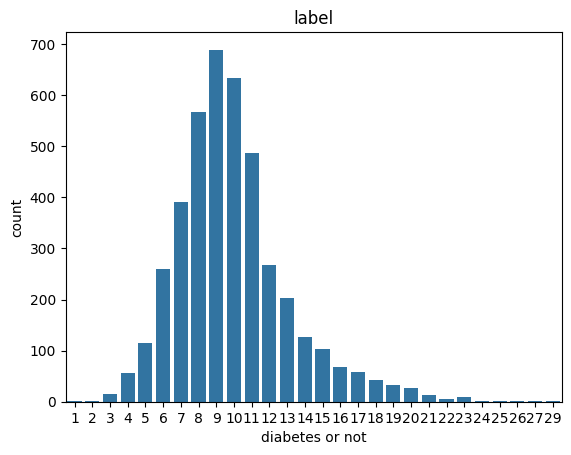

In [5]:
#레이블 갯수 확인
sns.countplot(data=df, x="Rings")
plt.xlabel("diabetes or not")
plt.ylabel("count")
plt.title("label")

In [6]:
#레이블 갯수 확인 (숫자)
df["Rings"].value_counts()

,count
Rings,
9,689
10,634
8,568
11,487
7,391
12,267
6,259
13,203
14,126


In [61]:
#결측치 확인
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
Rings,0
Rings_category,0


In [11]:
#결측치 제거
df=df.dropna()
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
Rings,0


In [20]:
#범주형 변수를 수치형 데이터로 변경
#남성은 0, 여성은 1, null은 2
df['Sex']=df['Sex'].replace({'M':0, 'F':1, 'I':2})
df['Sex']

,Sex
id,
0,0
1,0
2,1
3,0
4,2
...,...
4172,1
4173,0
4174,0


<ipython-input-21-ed3dd18cd381>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sex'], kde = True, hist = False, ax=ax1)
<ipython-input-21-ed3dd18cd381>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], ax=ax2)


<Axes: xlabel='Length', ylabel='Density'>

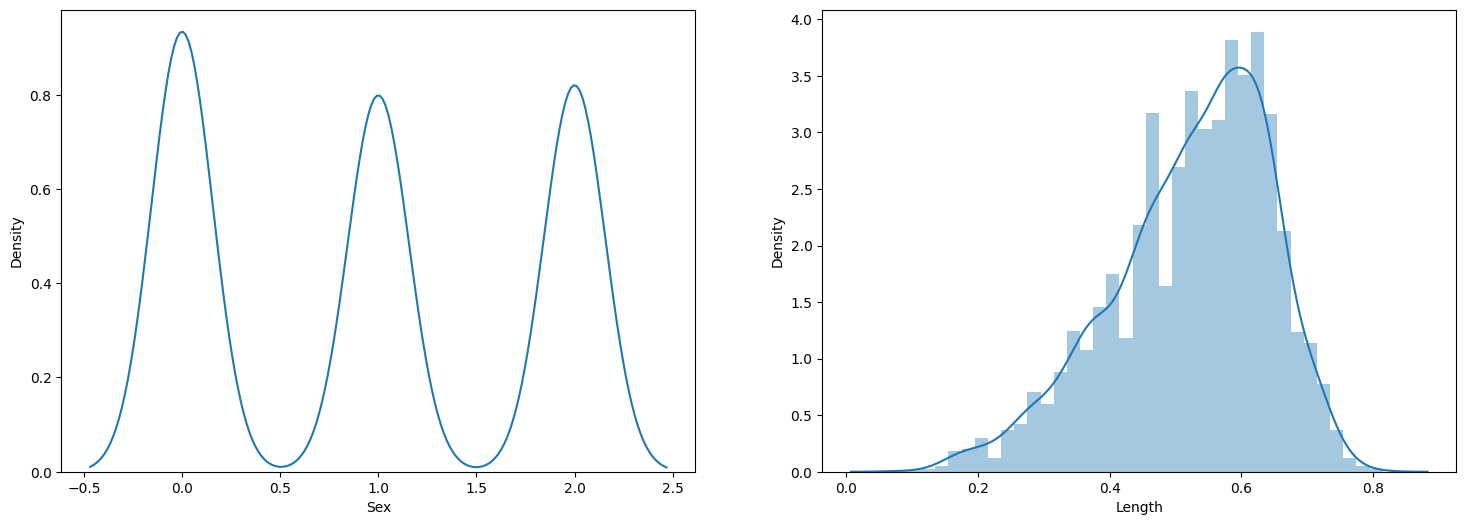

In [21]:
# 컬럼별 히스토그램 확인

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Sex'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Length'], ax=ax2)

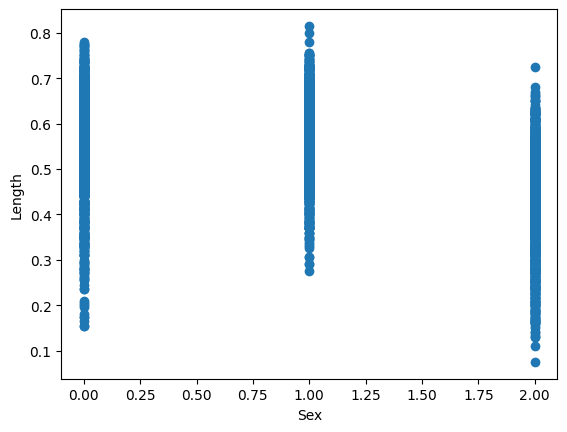

In [22]:
# 산점도 확인


plt.scatter(df['Sex'], df['Length'])
plt.xlabel('Sex')
plt.ylabel('Length')

plt.show()

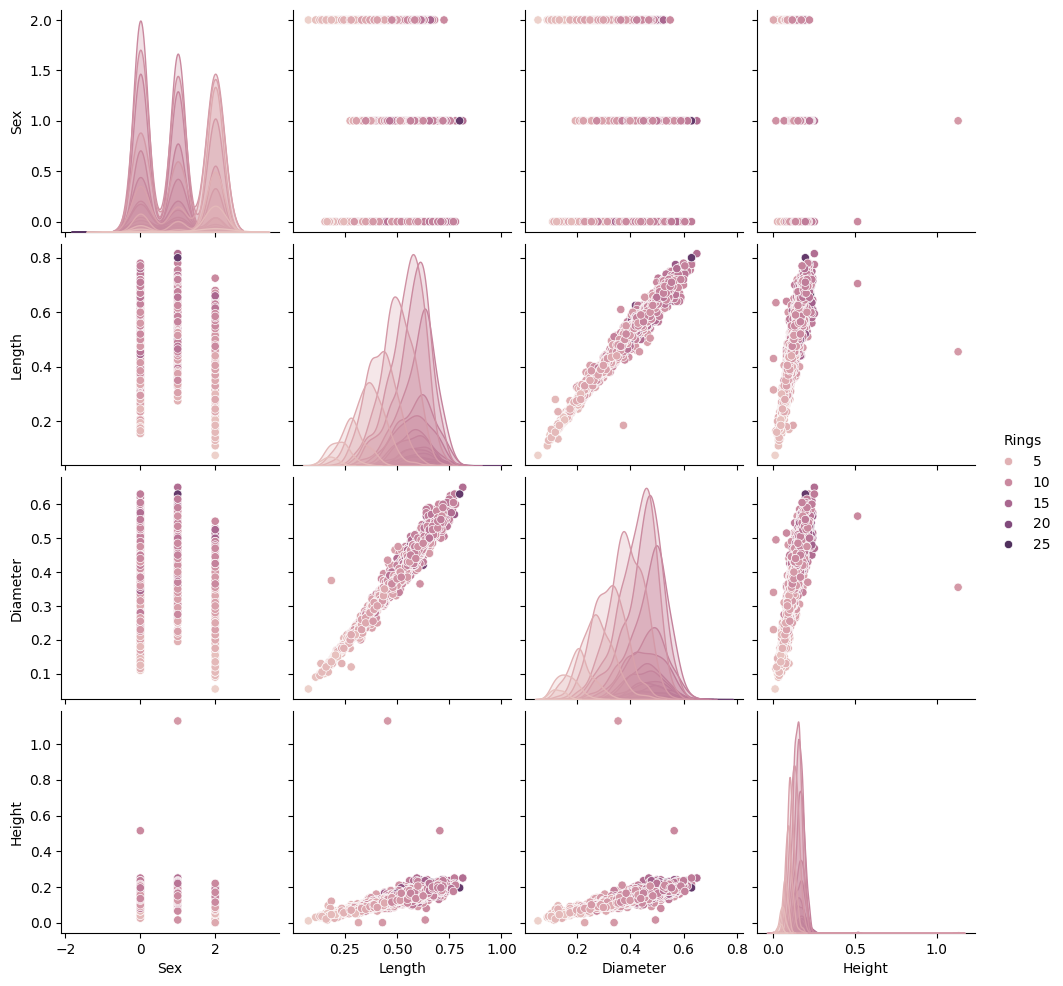

In [25]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Sex', 'Length', 'Diameter', 'Height'], hue ='Rings')
plt.show()

<ipython-input-27-098e9715560a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Length", data=df, palette="Set3")


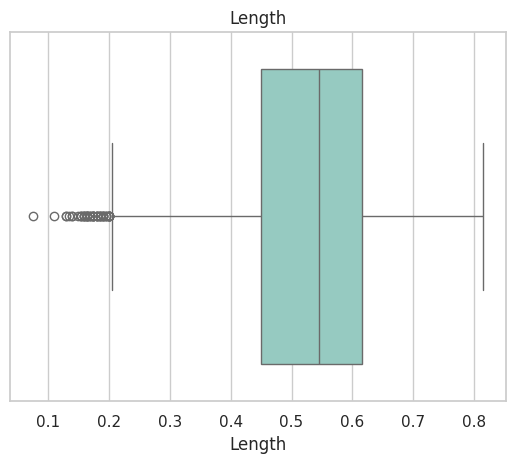

In [27]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Length", data=df, palette="Set3")
plt.title("Length")
plt.show()

<ipython-input-28-59f636b60fdc>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


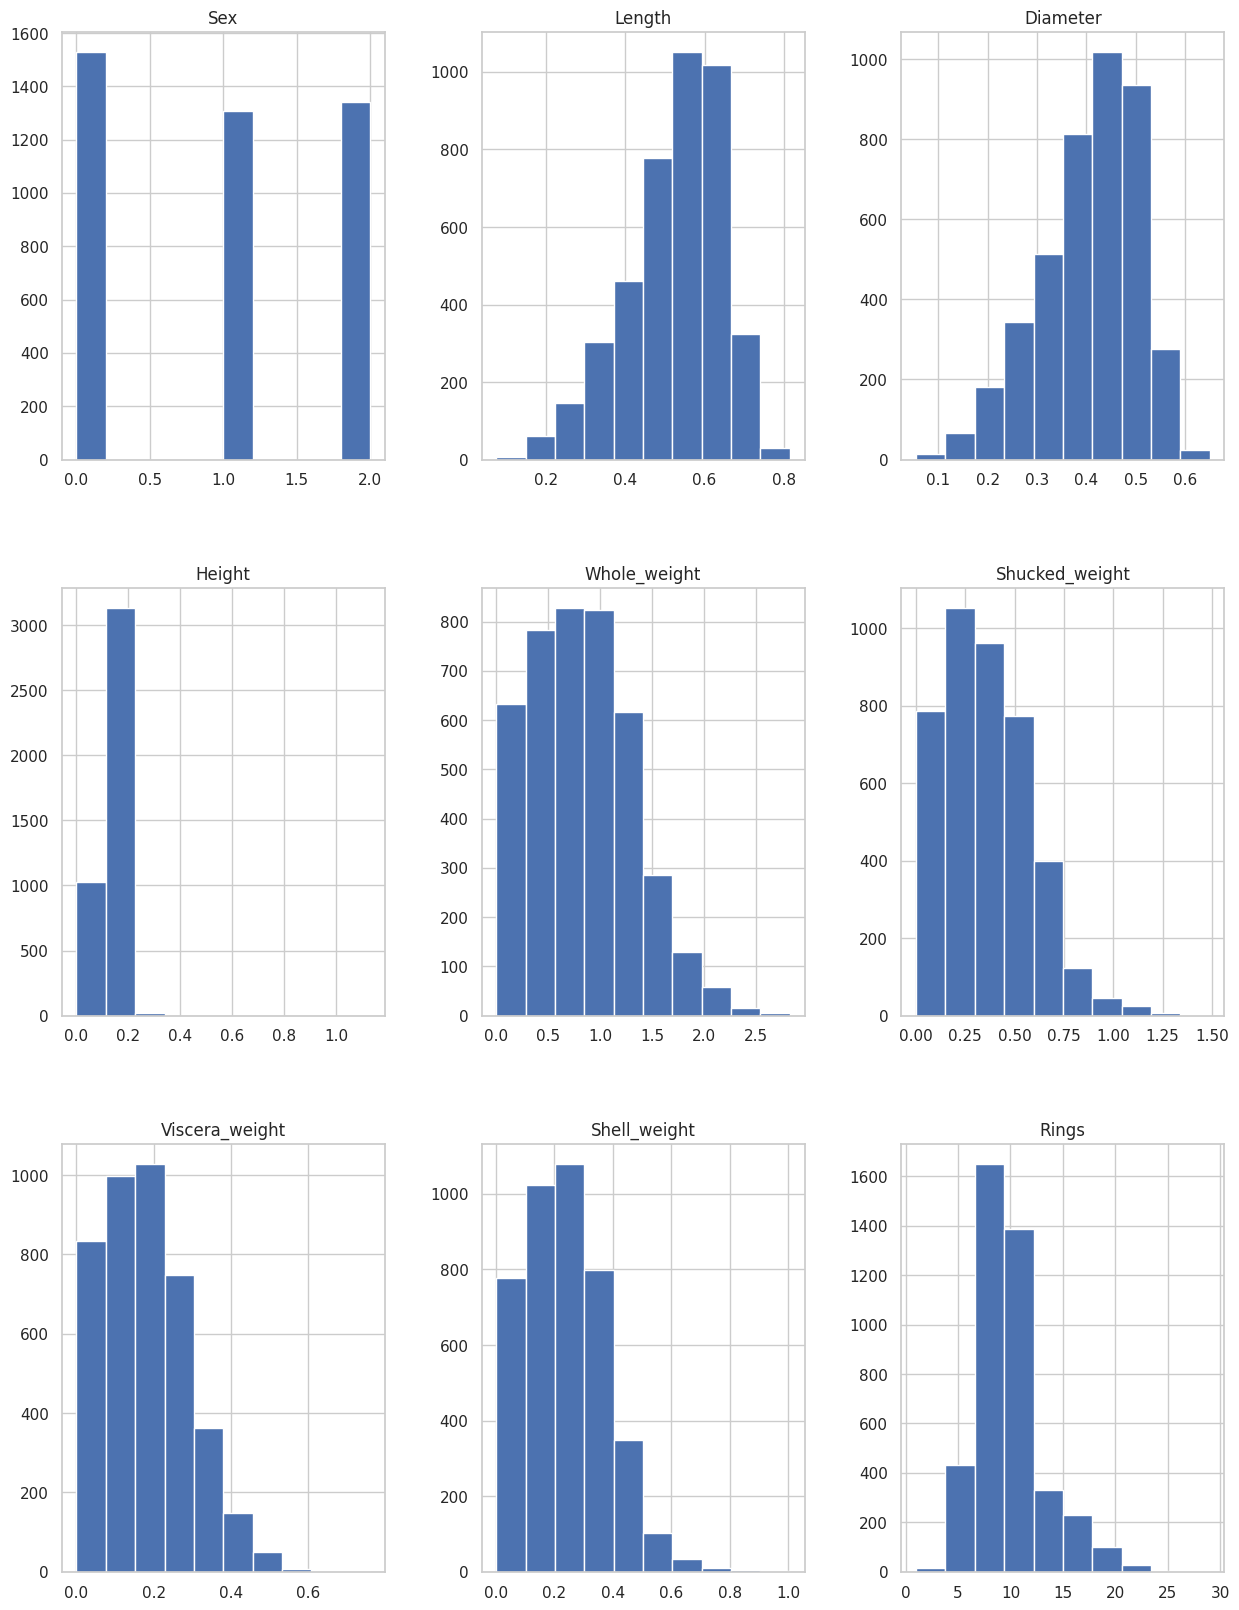

In [28]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [119]:
#범주형으로 변환
#범주형으로 전환하지 않을 시 정확도가 0.25로 낮아지므로 범주형으로 전환하였습니다.
bins=[0,5,10,20,30]
labels=['0', '6', '11', '21']
df['Rings_category']=pd.cut(df['Rings'], bins=bins, labels=labels)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Rings_category
id,,,,,,,,,,
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,11
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,6
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,6
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,6
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,6
...,...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,6
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,6


In [120]:
X=df.drop(['Rings', 'Rings_category'],axis=1)
X.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0


In [121]:
y=df['Rings_category']
y.value_counts()


,count
Rings_category,
6,2541
11,1411
0,189
21,36


#머신러닝 분류

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)
clf_lr = LogisticRegression(max_iter=1000, multi_class='multinomial')

clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.722488038277512
[[ 24   0   0  25]
 [  0 140   0 149]
 [  0   6   0   0]
 [  4  48   0 440]]


#머신러닝 회귀

In [123]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Rings_category
id,,,,,,,,,,
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,11
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,6
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,6
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,6
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,6
...,...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,6
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,6


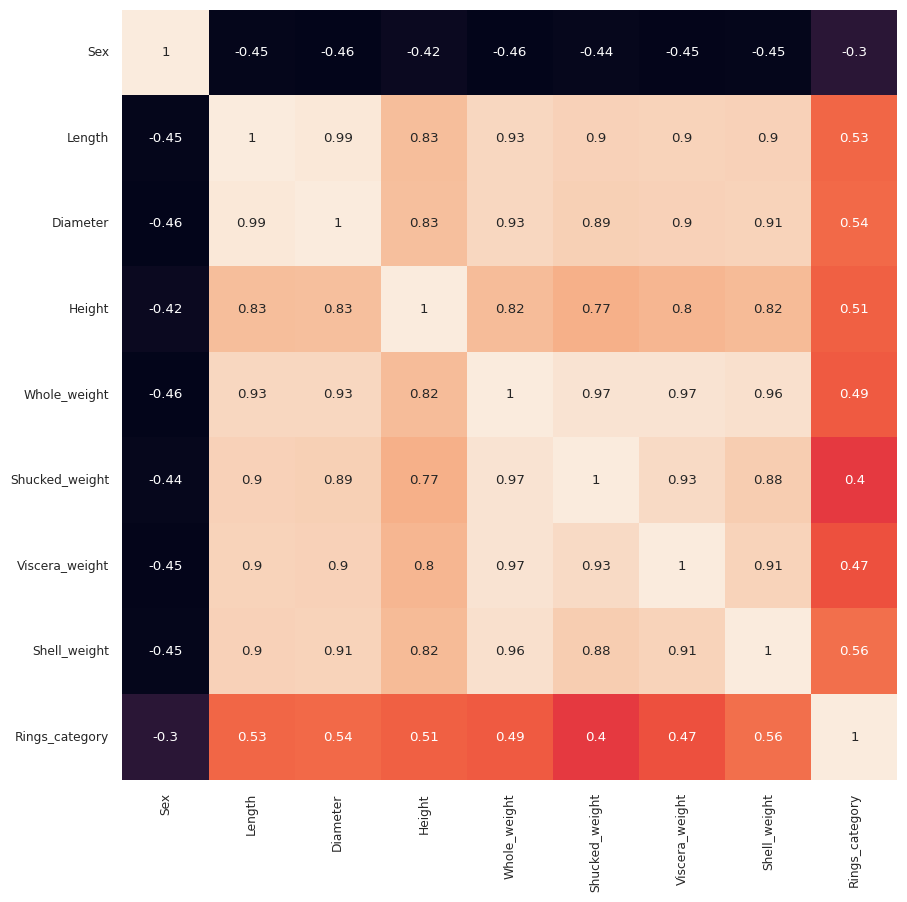

In [127]:
#상관 관계 행렬
df_Rings=df.drop(['Rings'], axis=1)
df_corr=df_Rings.corr()
#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()
#Rings와 관계가 높은 것은 Shell_weight

In [145]:
#Rings, Rings_categorical삭제
X = df.drop(['Rings', 'Rings_category'],axis=1)

X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [146]:
y = df['Rings_category']
y.head()

,Rings_category
id,
0,11
1,6
2,6
3,6
4,6


In [139]:
y1=df['Rings_category']
y1.isnull().sum()

0

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 8) (3341,)
(836, 8) (836,)


In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 4.651223790757481


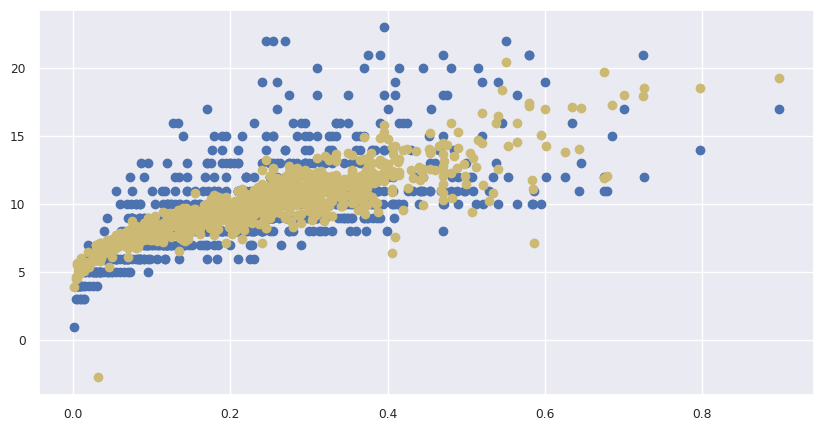

In [148]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ly_preds, c='y', label='ly_preds')
plt.show()

#딥러닝 분류

In [149]:
#원 핫 인코딩
Y=pd.get_dummies(df['Rings_category'])
Y

,0,6,11,21
id,,,,
0,False,False,True,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
4172,False,False,True,False
4173,False,True,False,False
4174,False,True,False,False


In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=0)

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 모델 정의
model = Sequential()
# 7개의 특성
model.add(Dense(10, input_shape=(8,), activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(6, activation="tanh"))
model.add(Dense(4, activation="softmax"))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 260 (1.02 KB)

 Trainable params: 260 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
X_train.shape

(3341, 8)

In [158]:
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))
y_pred=model.predict(X_test)

y_pred_class = np.argmax(y_pred, axis=1)

y_test_class = np.argmax(y_test, axis=1)


Epoch 1/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4896 - loss: 1.1674 - val_accuracy: 0.6400 - val_loss: 0.7749
Epoch 2/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6448 - loss: 0.7376 - val_accuracy: 0.6411 - val_loss: 0.7100
Epoch 3/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6517 - loss: 0.6687 - val_accuracy: 0.6364 - val_loss: 0.7018
Epoch 4/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6902 - loss: 0.6418 - val_accuracy: 0.6842 - val_loss: 0.6704
Epoch 5/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6786 - loss: 0.6453 - val_accuracy: 0.6818 - val_loss: 0.6642
Epoch 6/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7129 - loss: 0.6194 - val_accuracy: 0.6866 - val_loss: 0.6524
Epoch 7/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6849 - loss: 0.6468 - val_accuracy: 0.7069 - val_loss: 0.6401
Epoch 8/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7071 - loss: 0.6129 - val_accuracy: 0.

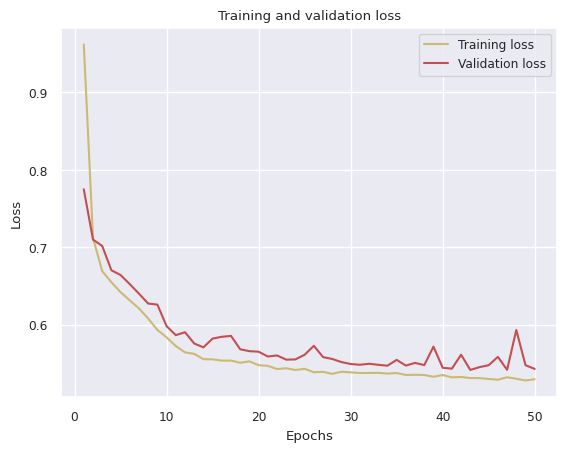

In [159]:
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
epochs=range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

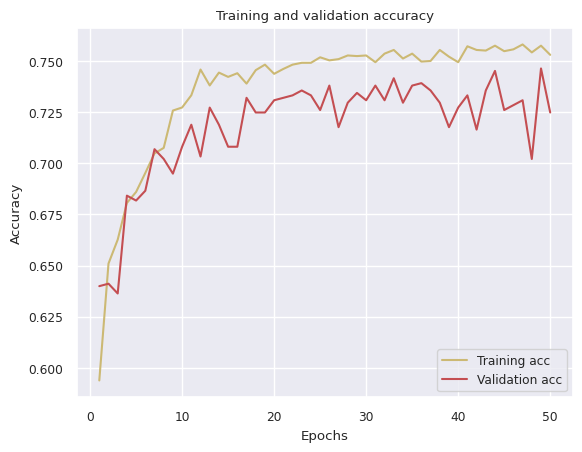

In [160]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [161]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.62      0.67      0.65        49
           1       0.74      0.85      0.79       492
           2       0.72      0.54      0.62       289
           3       0.00      0.00      0.00         6

    accuracy                           0.72       836
   macro avg       0.52      0.52      0.51       836
weighted avg       0.72      0.72      0.71       836

[[ 33  16   0   0]
 [ 20 417  55   0]
 [  0 133 156   0]
 [  0   0   6   0]]


#딥러닝 회귀

In [162]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(4))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │             124 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,396 (5.45 KB)

 Trainable params: 1,396 (5.45 KB)

 Non-trainable params: 0 (0.00 B)

In [163]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1463 - mse: 0.1463 - val_loss: 0.1209 - val_mse: 0.1209
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1138 - mse: 0.1138 - val_loss: 0.1183 - val_mse: 0.1183
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1095 - mse: 0.1095 - val_loss: 0.1186 - val_mse: 0.1186
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1050 - mse: 0.1050 - val_loss: 0.1094 - val_mse: 0.1094
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1034 - mse: 0.1034 - val_loss: 0.1084 - val_mse: 0.1084
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1003 - mse: 0.1003 - val_loss: 0.1062 - val_mse: 0.1062
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0975 - mse: 0.0975 - val_loss: 0.1047 - val_mse: 0.1047
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0995 - mse: 0.0995 - val_loss: 0.1023 - val_mse: 0.1023
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

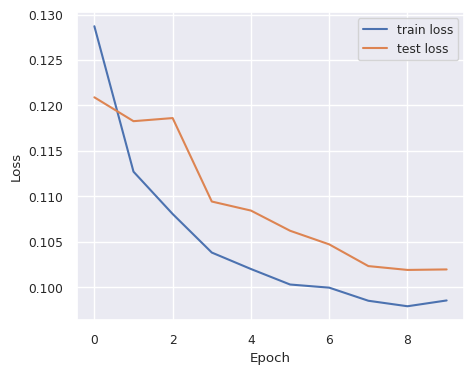

In [164]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [165]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1012 - mse: 0.1012


[0.10196240991353989, 0.10196240991353989]